## Objective
* The objective of this exercise is to explore and visualize the Traffic Index dataset to gain insights and understand the patterns in the data.

##Dataset Description

| Column Name | Description | Data Type |
| :---------------- | :------: | ----: |
|   City  |   Name of the city	   | Object |
| Datetime           |   Date and time of the data entry	   | Object |
|  TrafficIndexLive    |  Real-time traffic index	   | Int |
|  Jamscount |  Number of traffic jams	   | Int |
|   JamsDelay  |   Total delay caused by traffic jams (in minutes)	   | Float |
|JamsLength           |   Total length of traffic jams (in kilometers)	   | Float |
|  TrafficIndexWeekAgo    |  Traffic index one week ago	   | Int |
|  TravelTimeHistoric |  Historical average travel time (in minutes)	   | Float |
|   TravelTimeLive  |   Real-time travel time (in minutes)	   | Float |


In [81]:
import pandas as pd

In [82]:
df1=pd.read_csv("Task (1) Dataset.csv")
df2=pd.read_csv("Task (2) Dataset.csv")

In [83]:
column_merge=df1[['Weather_conditions']]

In [84]:
df2=pd.concat([df2, column_merge], axis=1)

In [85]:
df2.head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive,Weather_conditions
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617,Normal
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629,Normal
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834,Normal
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917,Normal
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246,Normal


In [86]:
df2.tail()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive,Weather_conditions
66634,Riyadh,2023-12-15 03:01:30,8,33,127.8,20.4,8,63.926569,63.245473,NaN
66635,Riyadh,2023-12-15 04:31:30,6,27,87.0,13.8,5,59.182641,60.012955,NaN
66636,Riyadh,2023-12-15 05:01:30,3,17,49.8,6.7,1,57.746816,57.561438,NaN
66637,Riyadh,2023-12-15 06:01:30,0,16,61.3,4.3,0,56.535277,55.463218,NaN
66638,Riyadh,2023-12-15 07:01:30,0,15,39.5,5.2,0,56.126417,54.886055,NaN


In [87]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66639 entries, 0 to 66638
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 66639 non-null  object 
 1   Datetime             66639 non-null  object 
 2   TrafficIndexLive     66639 non-null  int64  
 3   JamsCount            66639 non-null  int64  
 4   JamsDelay            66639 non-null  float64
 5   JamsLength           66639 non-null  float64
 6   TrafficIndexWeekAgo  66639 non-null  int64  
 7   TravelTimeHistoric   62772 non-null  float64
 8   TravelTimeLive       62772 non-null  float64
 9   Weather_conditions   12316 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 5.1+ MB


In [88]:
df2.isna().sum()

City                       0
Datetime                   0
TrafficIndexLive           0
JamsCount                  0
JamsDelay                  0
JamsLength                 0
TrafficIndexWeekAgo        0
TravelTimeHistoric      3867
TravelTimeLive          3867
Weather_conditions     54323
dtype: int64

In [89]:
df2.duplicated().sum()

0

In [90]:
drop_nul = ['TravelTimeHistoric', 'TravelTimeLive']
# Drop rows with null values in 'Road_surface_type' 
df2.dropna(subset=drop_nul, inplace=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'TrafficIndexLive'),
  Text(1, 0, 'JamsCount'),
  Text(2, 0, 'JamsDelay'),
  Text(3, 0, 'JamsLength'),
  Text(4, 0, 'TrafficIndexWeekAgo'),
  Text(5, 0, 'TravelTimeHistoric'),
  Text(6, 0, 'TravelTimeLive')])

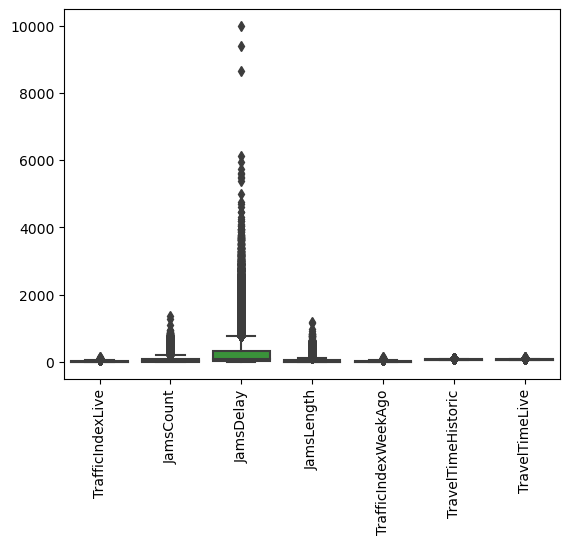

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df2)
plt.xticks(rotation=90)

In [92]:
import numpy as np

# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from 'Fare' using the remove_outilers function (1 line)
df2 = remove_outliers(df2, 'JamsDelay')
df2 = remove_outliers(df2, 'JamsLength')
df2 = remove_outliers(df2, 'JamsCount')
df2 = remove_outliers(df2, 'TrafficIndexWeekAgo')


In [93]:
# convert Datetime  to date-time type
df2['Datetime'] = pd.to_datetime(df2['Datetime'])

# Tasks

## 1. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [94]:
df2.describe()

,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
count,48080,48080.000000,48080.000000,48080.000000,48080.000000,48080.000000,48080.000000,48080.000000
mean,2023-08-09 06:39:25.042054656,8.349376,26.936772,91.806934,12.822250,8.511190,69.069939,66.797290
min,2023-01-17 17:46:30,0.000000,0.000000,0.000000,0.000000,0.000000,49.381346,46.723235
25%,2023-06-22 10:46:30,2.000000,6.000000,18.400000,2.000000,2.000000,61.709460,58.932405
50%,2023-08-21 04:01:30,7.000000,16.000000,53.550000,6.300000,7.000000,67.305521,65.022363
75%,2023-10-16 21:01:00,13.000000,40.000000,134.600000,18.200000,13.000000,74.616317,73.439302
max,2023-12-15 07:46:30,44.000000,107.000000,744.800000,76.200000,32.000000,120.140593,104.896880
std,NaN,7.406244,27.292036,97.909599,15.398028,7.625097,9.815143,9.737985


### Identify and analyze patterns in the data.

C:\Users\hayoo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


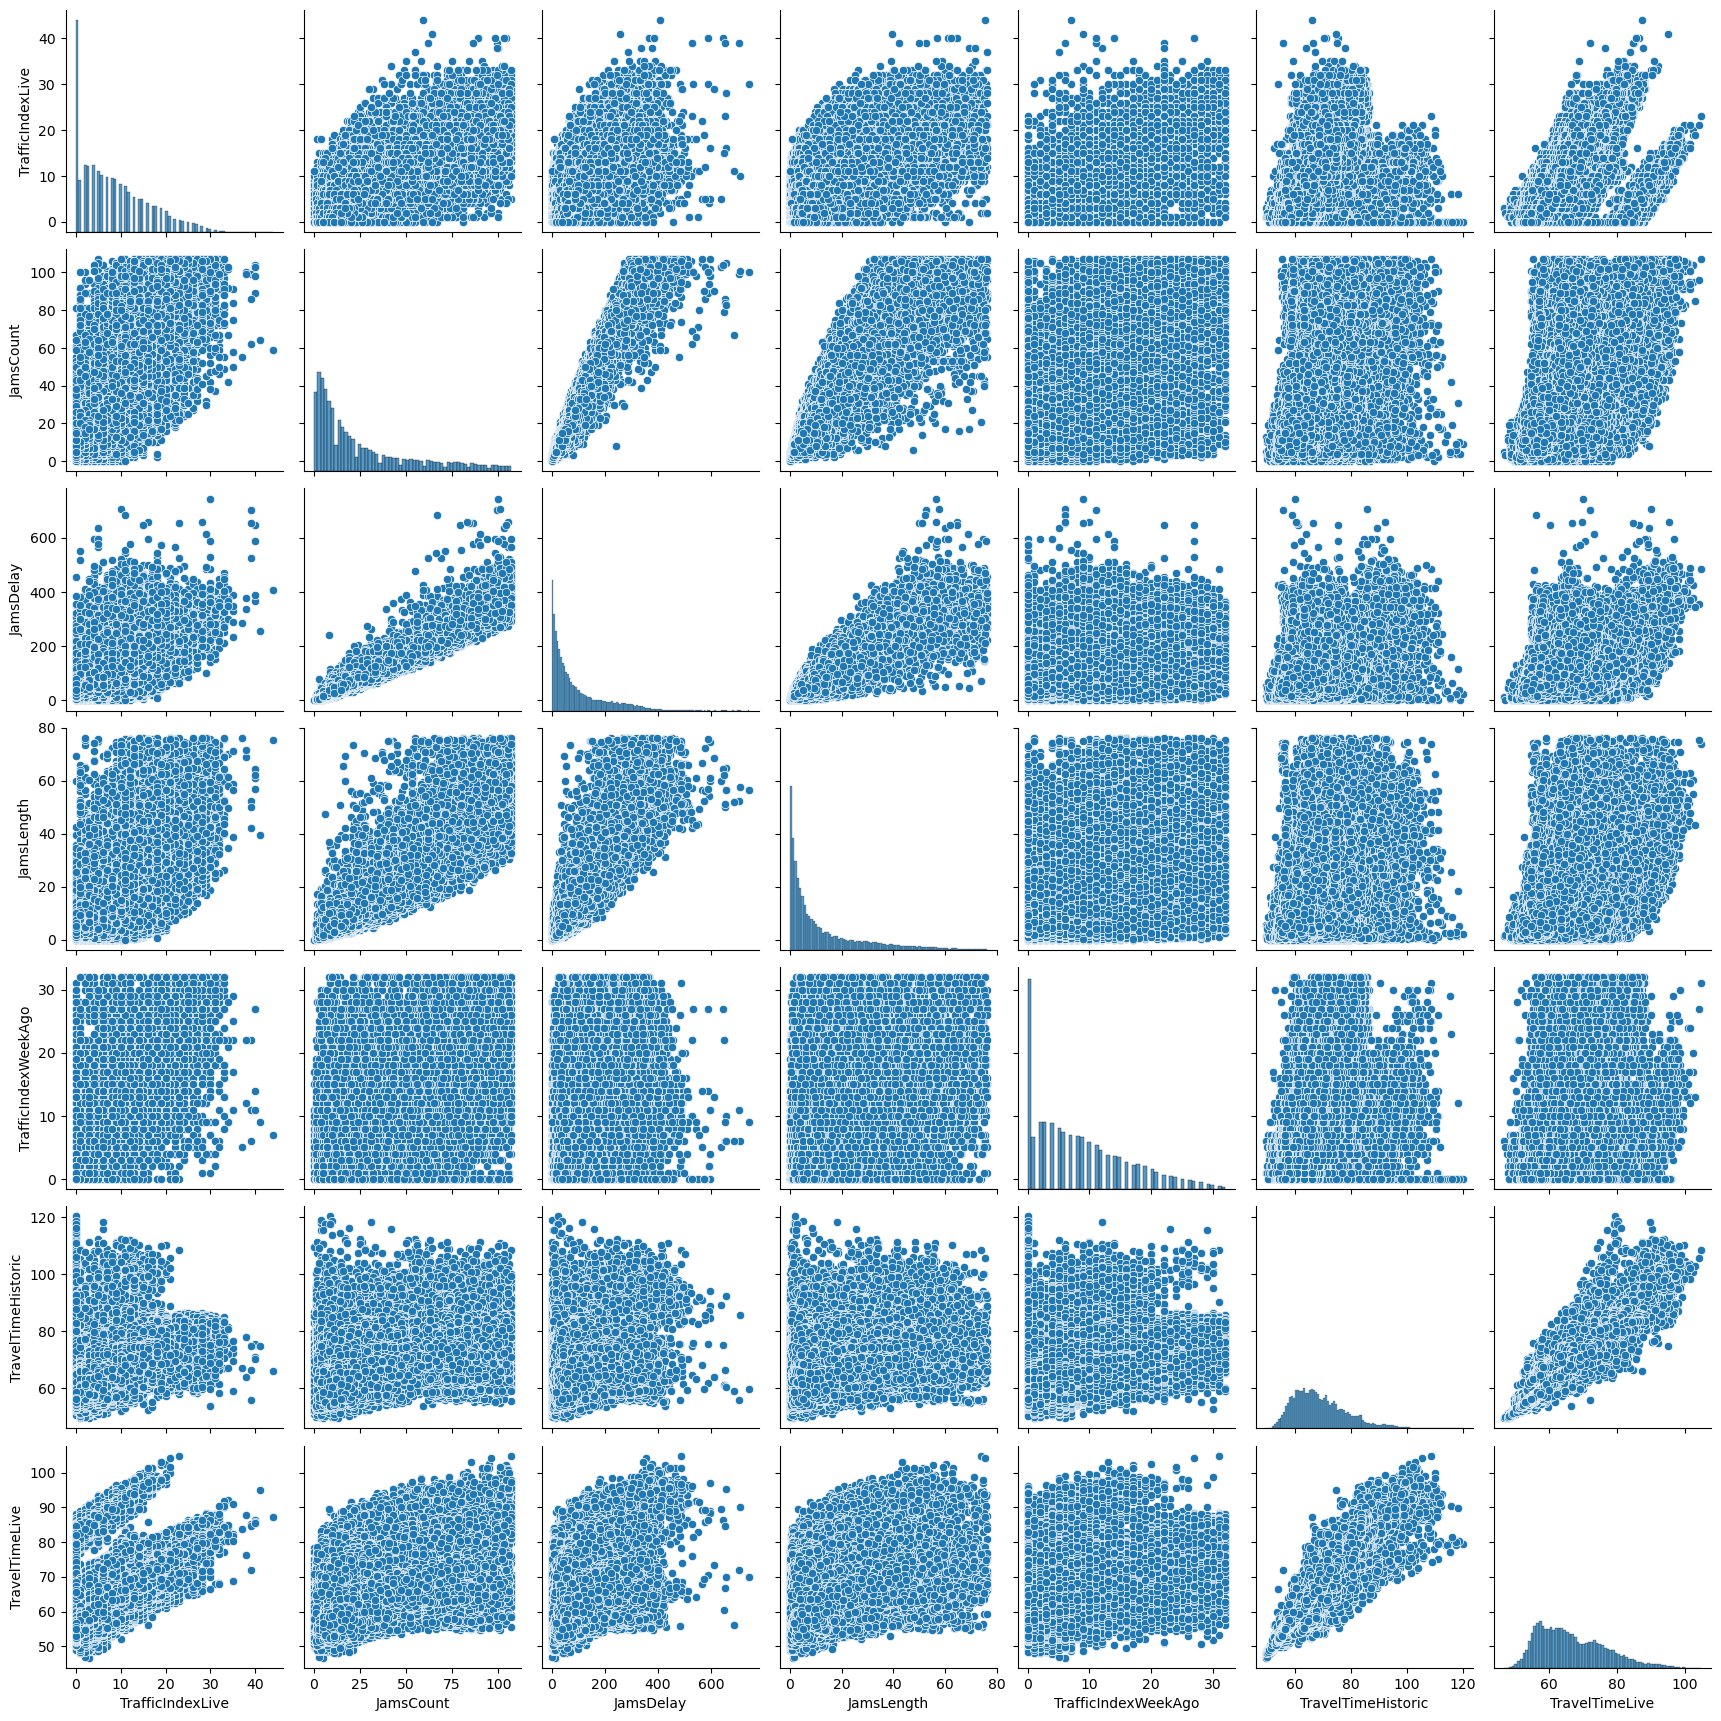

In [95]:
import seaborn as sns
sns.pairplot(df2)

### Visualize the distribution of key variables (e.g., Traffic_Index, Date).

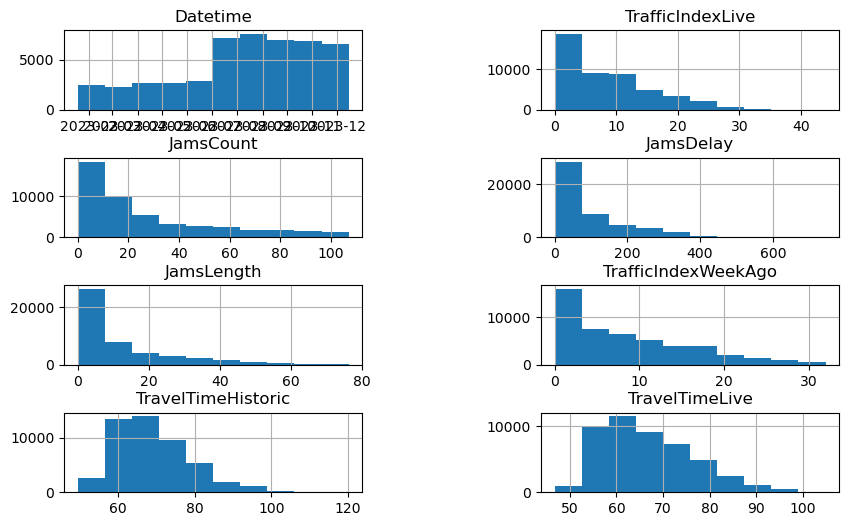

In [96]:
import matplotlib.pyplot as plt

#define number of subplots
fig, axis = plt.subplots(4, 2,  figsize=(10,6))

#create histogram for each column in DataFrame
df2.hist(ax=axis)
plt.subplots_adjust(hspace=0.6, wspace=0.6)


### Explore relationships between variables (e.g., Traffic_Index vs. Weather_Condition).


In [97]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df2['Weather_conditions'] = label_encoder.fit_transform(df2['Weather_conditions'])


In [98]:
col_cor=df2[['TrafficIndexLive', 'Weather_conditions']]
cor_matrix=col_cor.corr()
cor_matrix

,TrafficIndexLive,Weather_conditions
TrafficIndexLive,1.000000,0.072762
Weather_conditions,0.072762,1.000000


## 2. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


<Axes: >

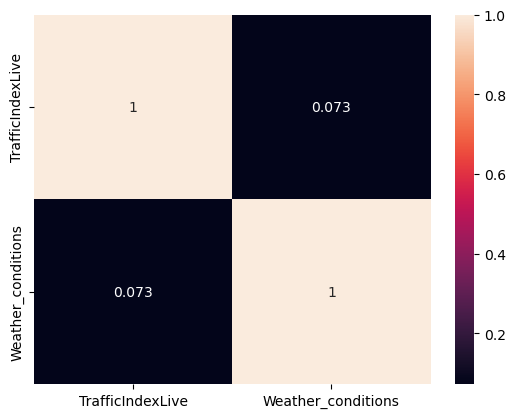

In [99]:
sns.heatmap(cor_matrix, annot=True)

### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

([<matplotlib.patches.Wedge at 0x119d18ed050>,
 [Text(0.9756639791237361, 0.5080155507860346, 'Doha'),
  Text(0.22002466797852688, 1.0777704512005046, 'Cairo'),
  Text(-0.6189335819893973, 0.9093520886245186, 'Kuwait'),
  Text(-1.0402600911696835, 0.35757368851698534, 'Al-ain'),
  Text(-1.0834890079591668, -0.1898725088886248, 'Medina'),
  Text(-0.8582576802739741, -0.688036157662326, 'Mecca'),
  Text(-0.4362425137491767, -1.009798231924477, 'Abudhabi'),
  Text(0.07254111839475995, -1.0976054783673583, 'Dammam'),
  Text(0.5494811957924606, -0.9529272876093369, 'Dubai'),
  Text(0.8974198689024364, -0.636111294428211, 'Riyadh'),
  Text(1.077424088290105, -0.22171453261398147, 'Jeddah')],
 [Text(0.5321803522493106, 0.27709939133783695, '15.3%'),
  Text(0.12001345526101465, 0.5878747915639115, '13.0%'),
  Text(-0.3376001356305803, 0.4960102301588282, '12.4%'),
  Text(-0.5674145951834636, 0.19504019373653744, '8.0%'),
  Text(-0.5909940043413636, -0.10356682303015897, '8.0%'),
  Text(-0.4681

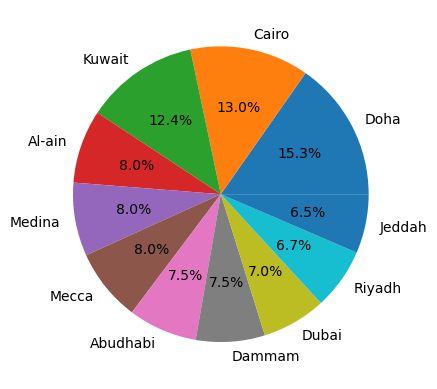

In [100]:
#plot for most city 
plt.pie(x=df2['City'].value_counts().values,
        labels=df2['City'].value_counts().index,
        autopct='%0.1f%%')

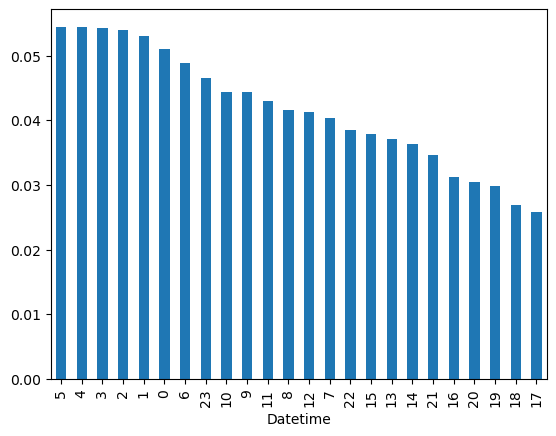

In [101]:
#bar plot for the most common time:
# Horizontal Bar Plot
result = df2['Datetime'].dt.hour 
(result.value_counts() / len(df2)).plot.bar()

plt.show()

<Axes: xlabel='JamsCount', ylabel='JamsDelay'>

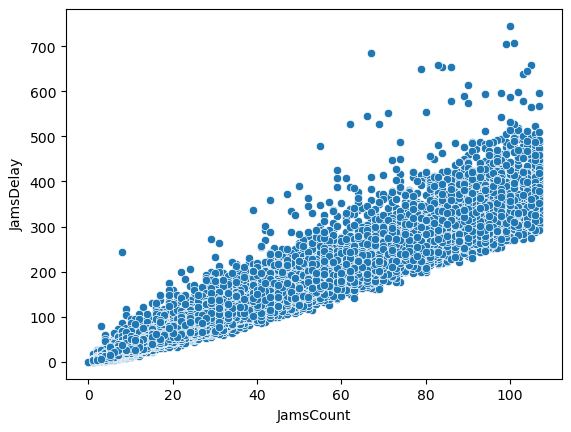

In [66]:
sns.scatterplot(data=df2 ,x='JamsCount', y='JamsDelay')

## 3. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>

* <h4> Most common time is 5 a.m <h4/>
* <h4>Most common city: Doha<h4/>
* <h4> correlation between Traffic_Index and Weather_Condition is week <h4/>
* <h4> Jams delay is increase when Jams count is increase <h4/>




